<a href="https://colab.research.google.com/github/polina-tolstokulakova/project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#открытие датасета
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset.csv")

df

,date,time,event,platform,ad_id,ad_cost_type,ad_cost
0,2019-04-01,2019-04-01 0:00:48,view,web,121288,CPM,187.4
1,2019-04-01,2019-04-01 0:04:41,view,ios,121288,CPM,187.4
2,2019-04-01,2019-04-01 0:07:50,view,android,121288,CPM,187.4
3,2019-04-01,2019-04-01 0:07:50,view,android,121288,CPM,187.4
4,2019-04-01,2019-04-01 0:08:46,view,ios,121288,CPM,187.4
...,...,...,...,...,...,...,...
602,2019-04-02,2019-04-01 22:39:16,click,android,121288,CPM,187.4
603,2019-04-02,2019-04-01 22:40:29,click,android,121288,CPM,187.4
604,2019-04-02,2019-04-01 22:40:31,click,web,121288,CPM,187.4
605,2019-04-02,2019-04-01 22:44:14,click,ios,121288,CPM,187.4


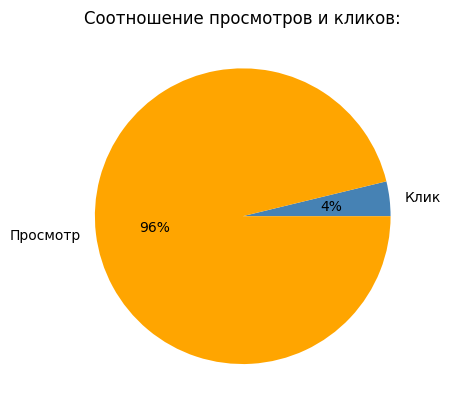

In [2]:
#инфографик 1
df.groupby('event')['event'].count().plot(kind='pie', 
                                          labels=['Клик','Просмотр'], 
                                          ylabel='', 
                                          autopct='%1.0f%%', 
                                          colors=['steelblue','orange'],
                                          title='Соотношение просмотров и кликов:')
plt.savefig('info1.png', bbox_inches='tight')

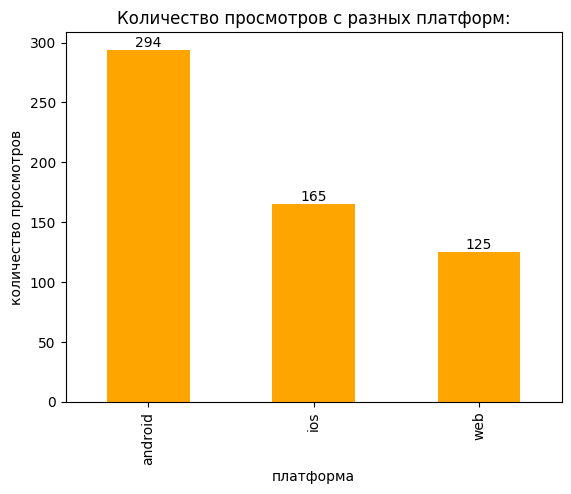

In [3]:
#инфографик 2
bar_view = df.groupby('platform')['event'].apply(lambda x: (x=='view').sum()).reset_index(name='view').plot(kind='bar',
                                                                                                            xlabel='платформа',
                                                                                                            ylabel='количество просмотров',
                                                                                                            x='platform',
                                                                                                            legend=False,
                                                                                                            color='orange',
                                                                                                            title='Количество просмотров с разных платформ:')
for container in bar_view.containers: 
  bar_view.bar_label (container)

plt.savefig('info2.png', bbox_inches='tight')

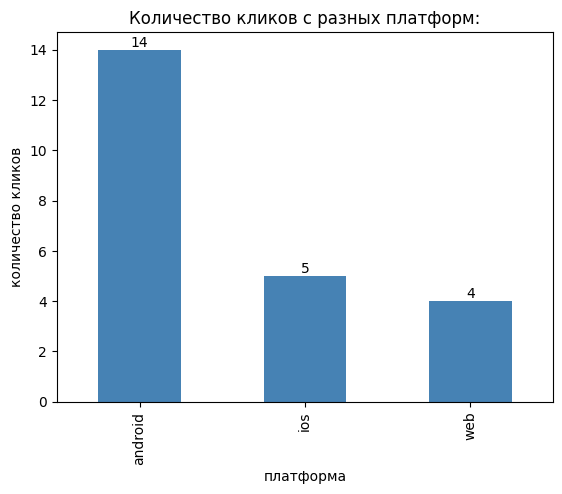

In [4]:
#инфографик 3
bar_click = df.groupby('platform')['event'].apply(lambda x: (x=='click').sum()).reset_index(name='click').plot(kind='bar',
                                                                                                            xlabel='платформа',
                                                                                                            ylabel='количество кликов',
                                                                                                            x='platform',
                                                                                                            legend=False,
                                                                                                            color='steelblue',
                                                                                                            title='Количество кликов с разных платформ:')
for container in bar_click.containers: 
  bar_click.bar_label (container)

plt.savefig('info3.png', bbox_inches='tight')

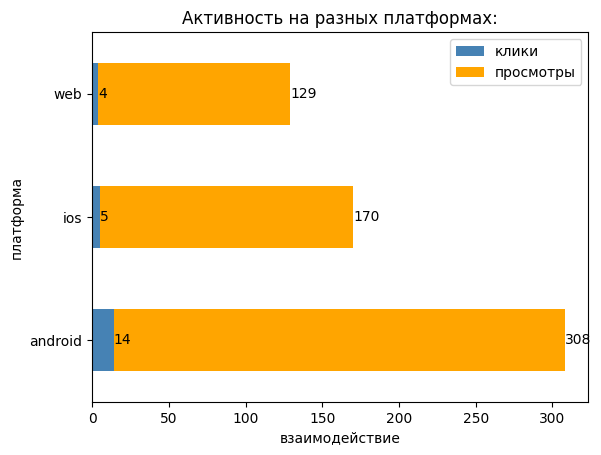

In [5]:
#инфографик 4
dview = df.groupby('platform')['event'].apply(lambda x: (x=='view').sum()).reset_index(name='view')
dclick = df.groupby('platform')['event'].apply(lambda x: (x=='click').sum()).reset_index(name='click')
  
result = pd.concat([dclick, dview], axis=1, join='inner')

result = result.T.drop_duplicates().T

bar_all = result.plot(kind='barh', 
                      stacked=True, 
                      x='platform',
                      xlabel='взаимодействие',
                      ylabel='платформа',
                      title='Активность на разных платформах:',
                      color={'click':'steelblue','view':'orange'})

plt.legend(['клики', 'просмотры'])
for container in bar_all.containers: 
  bar_all.bar_label (container)

plt.savefig('info4.png', bbox_inches='tight')

In [6]:
#перевод времени в тип данных "время"
df['time'] = pd.to_datetime(df.time, format='%Y-%m-%d %H:%M:%S')
df

,date,time,event,platform,ad_id,ad_cost_type,ad_cost
0,2019-04-01,2019-04-01 00:00:48,view,web,121288,CPM,187.4
1,2019-04-01,2019-04-01 00:04:41,view,ios,121288,CPM,187.4
2,2019-04-01,2019-04-01 00:07:50,view,android,121288,CPM,187.4
3,2019-04-01,2019-04-01 00:07:50,view,android,121288,CPM,187.4
4,2019-04-01,2019-04-01 00:08:46,view,ios,121288,CPM,187.4
...,...,...,...,...,...,...,...
602,2019-04-02,2019-04-01 22:39:16,click,android,121288,CPM,187.4
603,2019-04-02,2019-04-01 22:40:29,click,android,121288,CPM,187.4
604,2019-04-02,2019-04-01 22:40:31,click,web,121288,CPM,187.4
605,2019-04-02,2019-04-01 22:44:14,click,ios,121288,CPM,187.4


In [7]:
#выделение столбца "часы"
df["hour"] = df["time"].dt.to_period("H")
df

,date,time,event,platform,ad_id,ad_cost_type,ad_cost,hour
0,2019-04-01,2019-04-01 00:00:48,view,web,121288,CPM,187.4,2019-04-01 00:00
1,2019-04-01,2019-04-01 00:04:41,view,ios,121288,CPM,187.4,2019-04-01 00:00
2,2019-04-01,2019-04-01 00:07:50,view,android,121288,CPM,187.4,2019-04-01 00:00
3,2019-04-01,2019-04-01 00:07:50,view,android,121288,CPM,187.4,2019-04-01 00:00
4,2019-04-01,2019-04-01 00:08:46,view,ios,121288,CPM,187.4,2019-04-01 00:00
...,...,...,...,...,...,...,...,...
602,2019-04-02,2019-04-01 22:39:16,click,android,121288,CPM,187.4,2019-04-01 22:00
603,2019-04-02,2019-04-01 22:40:29,click,android,121288,CPM,187.4,2019-04-01 22:00
604,2019-04-02,2019-04-01 22:40:31,click,web,121288,CPM,187.4,2019-04-01 22:00
605,2019-04-02,2019-04-01 22:44:14,click,ios,121288,CPM,187.4,2019-04-01 22:00


In [8]:
#узнаем статистику по часам
line_time = df.groupby(['hour','event'])['event'].apply(lambda x: x.count()).reset_index(name='количество')
line_time


,hour,event,количество
0,2019-04-01 00:00,click,9
1,2019-04-01 00:00,view,15
2,2019-04-01 01:00,click,1
3,2019-04-01 01:00,view,1
4,2019-04-01 02:00,click,2
5,2019-04-01 02:00,view,2
6,2019-04-01 03:00,click,2
7,2019-04-01 03:00,view,2
8,2019-04-01 04:00,click,3
9,2019-04-01 04:00,view,6


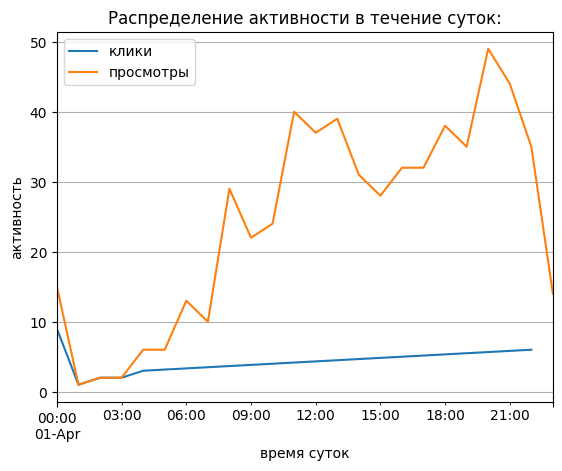

In [9]:
#инфографик 5
line_time = df.groupby(['hour','event'])['event'].apply(lambda x: (x=='click').count()).reset_index(name='количество')
line_time.set_index('hour', inplace = True)
line_time.groupby('event')['количество'].plot(xlabel='время суток',
                                              ylabel='активность',
                                              legend=True,
                                              x='h',
                                              y='y',
                                              title='Распределение активности в течение суток:',
                                              grid=True)
plt.legend(['клики', 'просмотры'])

plt.savefig('info5.png', bbox_inches='tight')

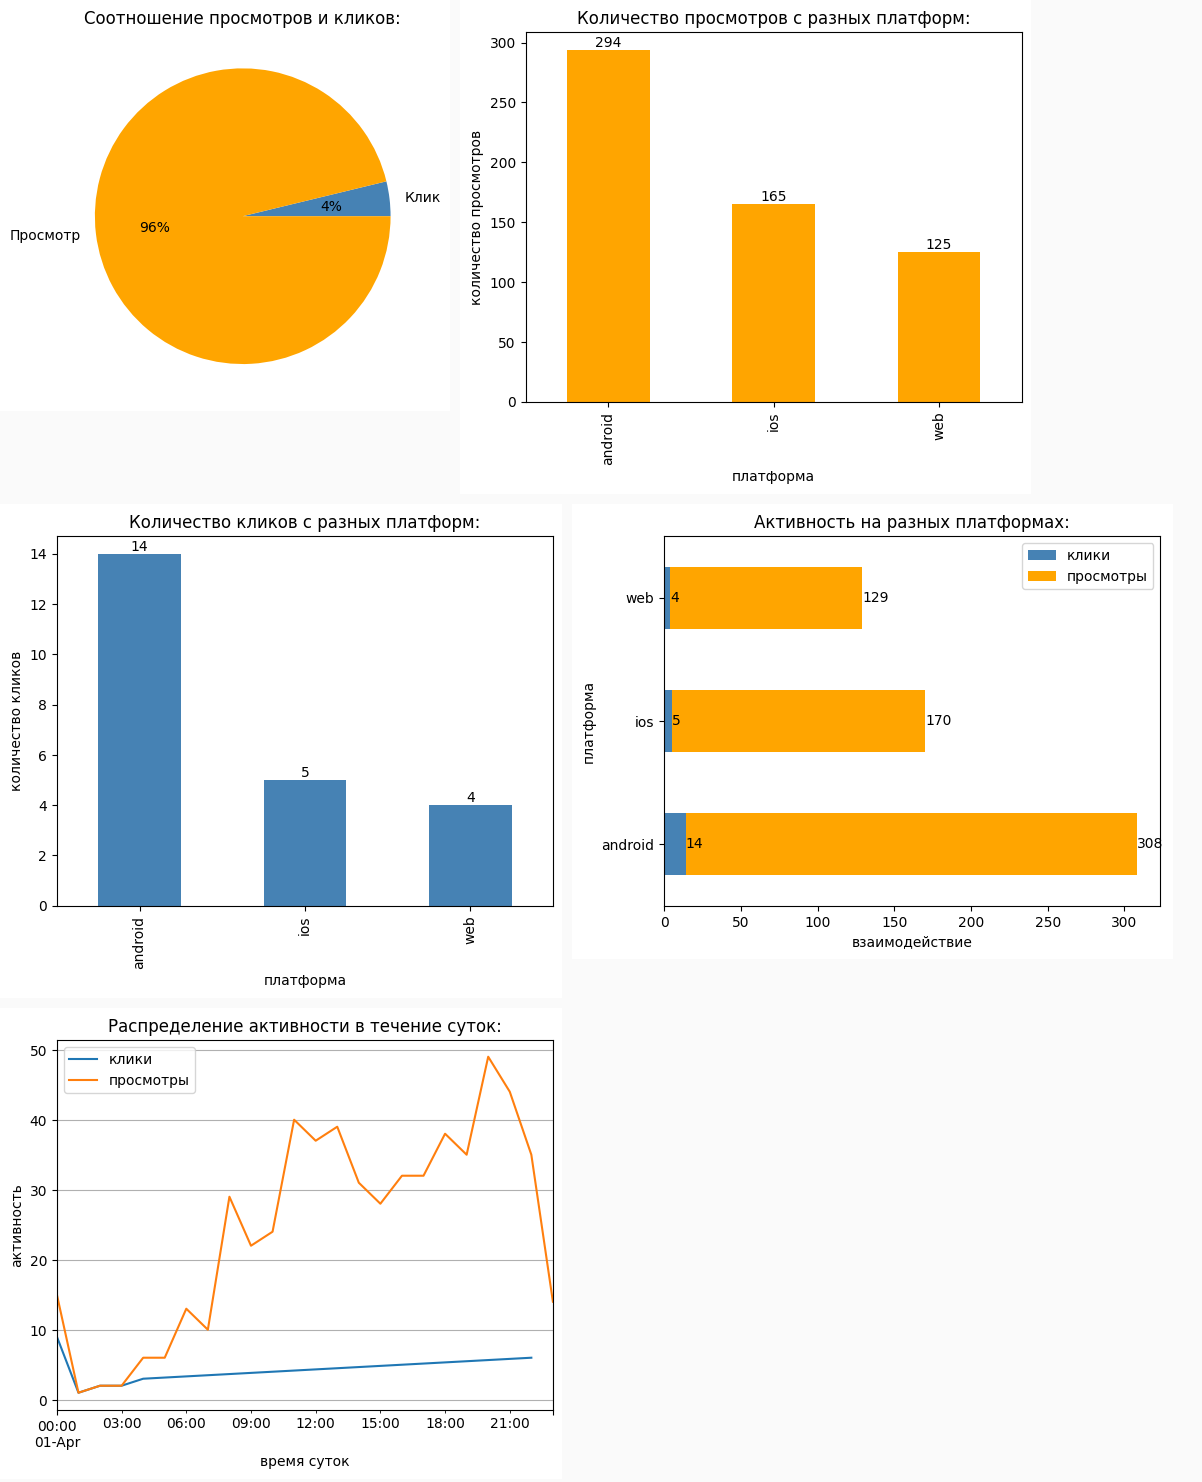

In [10]:
#объединение графиков в один файл
from PIL import Image
  
img_01 = Image.open('info1.png')
img_02 = Image.open('info2.png')
img_03 = Image.open('info3.png')
img_04 = Image.open('info4.png')
img_05 = Image.open('info5.png')
  
img_01_size = img_01.size
img_02_size = img_02.size
img_03_size = img_03.size
img_04_size = img_04.size
img_05_size = img_05.size
  
new_im = Image.new('RGB', (2*max(img_01_size[0],img_02_size[0],img_03_size[0],img_04_size[0]),3*max(img_01_size[1],img_03_size[1],img_05_size[1])), (250,250,250))

new_im.paste(img_01, (0,0))
new_im.paste(img_02, (img_01_size[0]+10,0))
new_im.paste(img_03, (0,max(img_01_size[1],img_02_size[1])+10))
new_im.paste(img_04, (img_03_size[0]+10,max(img_01_size[1],img_02_size[1])+10))
new_im.paste(img_05, (0,2*max(img_01_size[1],img_03_size[1])+20))
  
new_im.save('merged_images.png', 'PNG')
new_im.show()

In [11]:
#отправка на почту
import smtplib
import os
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
from platform import python_version
from datetime import timedelta, datetime

date_tomsk = datetime.now() + timedelta(hours=7)

server = 'smtp.yandex.ru'
user = '' #адрес отправителя @yandex.ru
password = '' #пароль почты отправителя

recipients = 'p.tolstokulakova@gmail.com' #ардес получателя
sender = '' #адрес отправителя @yandex.ru
subject = 'Анализ кликабельности на сайте'
text = 'Доброго полудня. Датасет проанализирован. Время: {}'.format(date_tomsk) + '\n' + 'Результат представлен в виде графиков в файле ниже.'

filepath = 'merged_images.png'
basename = os.path.basename(filepath)
filesize = os.path.getsize(filepath)

msg = MIMEMultipart('alternative')
msg['Subject'] = subject
msg['From'] = 'Polina Tolstokulakova <' + sender + '>'
msg['To'] = recipients
msg['Reply-To'] = sender
msg['Return-Path'] = sender
msg['X-Mailer'] = 'Python/' + (python_version())

part_text = MIMEText(text, 'plain')
part_file = MIMEBase('application', 'octet-stream; name="{}"'.format(basename))
part_file.set_payload(open(filepath, "rb").read())
part_file.add_header('Content-Description', basename)
part_file.add_header('Content-Disposition', 'attachment; filename="{}"; size={}'.format(basename, filesize))
encoders.encode_base64(part_file)

msg.attach(part_text)
msg.attach(part_file)

mail = smtplib.SMTP_SSL(server)
mail.login(user, password)
mail.sendmail(sender, recipients, msg.as_string())
print('Письмо успешно отправлено.')
mail.quit()

Письмо успешно отправлено.


(221, b'2.0.0 Closing connecton')